In [1]:
import pandas as pd

In [3]:
gosales = pd.read_csv(r'C:\Users\Shaleen\Desktop\jpnb\datasets\GoSales_Tx_LogisticRegression.csv')
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
58782,False,M,35,Married,Sales
32567,False,F,43,Married,Other
43027,False,M,25,Married,Other
37598,False,M,38,Single,Other
28867,False,M,38,Single,Sales
4354,False,F,37,Married,Other
49707,False,M,42,Married,Other
14942,False,F,23,Single,Sales
39687,False,M,48,Unspecified,Other
14698,False,F,25,Married,Other


In [4]:
gosales.shape

(60252, 5)

In [6]:
gosales.AGE.describe()

count    60252.000000
mean        34.187479
std         10.105477
min         17.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: AGE, dtype: float64

In [7]:
import matplotlib.pyplot as plt

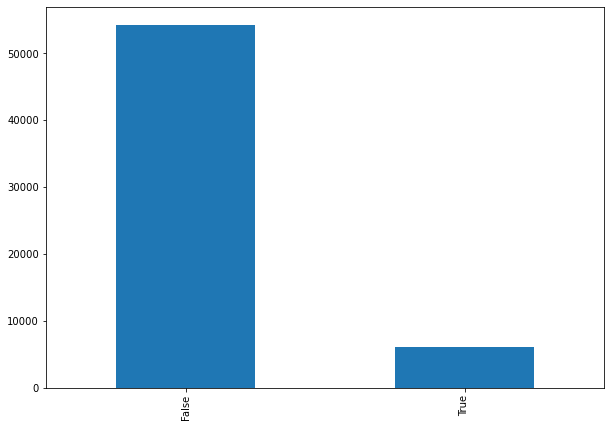

In [8]:
plt.figure(figsize=(10, 7))
pd.value_counts(gosales['IS_TENT']).plot.bar()
plt.show()

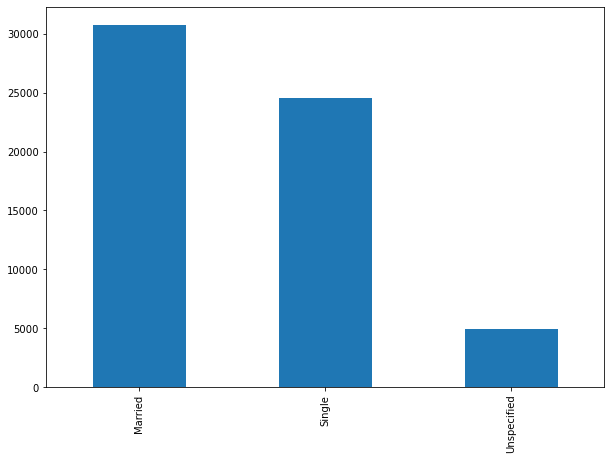

In [9]:
plt.figure(figsize=(10, 7))
pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()
plt.show()

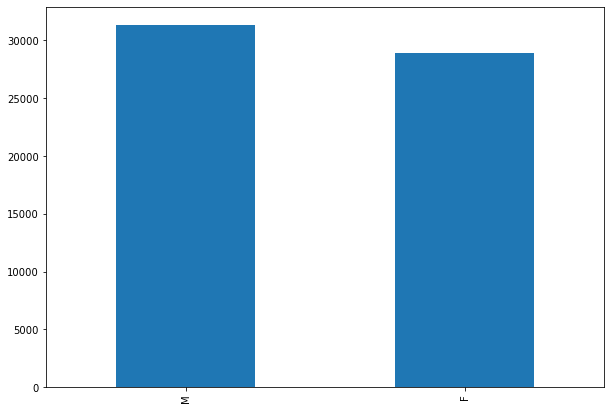

In [10]:
plt.figure(figsize=(10, 7))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()

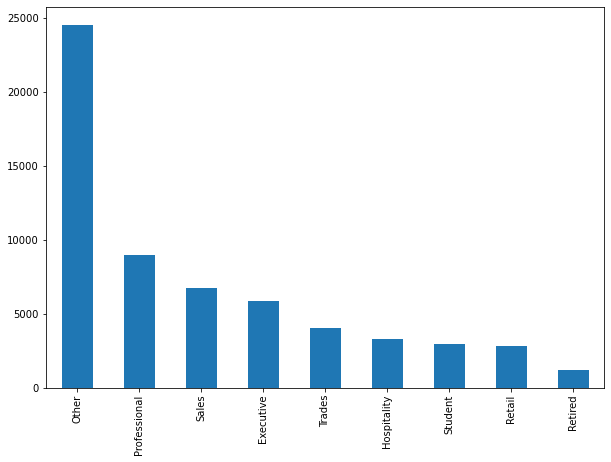

In [11]:
plt.figure(figsize=(10, 7))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()

In [12]:
gender = ['M', 'F']

In [13]:
from sklearn import preprocessing

label_encoding=preprocessing.LabelEncoder()

label_encoding=label_encoding.fit(gender)

In [14]:
gosales['GENDER'] = label_encoding.transform(gosales['GENDER'].astype(str))

In [15]:
label_encoding.classes_

array(['F', 'M'], dtype='<U1')

In [16]:
 gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
9116,False,1,28,Married,Professional
24031,True,1,29,Single,Professional
28436,False,0,37,Single,Retail
23314,False,0,29,Single,Retail
9686,False,0,29,Single,Student
57665,False,1,42,Married,Other
55298,False,1,26,Single,Sales
50715,False,1,30,Single,Professional
41741,False,1,37,Single,Other
29180,False,1,24,Single,Retail


In [18]:
gosales[['MARITAL_STATUS']].sample(5)

,MARITAL_STATUS
11864,Married
59898,Single
48835,Married
49180,Single
33694,Married


In [20]:
one_hot_encoding = preprocessing.OneHotEncoder()

one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1, 1))

one_hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [21]:
one_hot_labels = one_hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1, 1)).toarray()
one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [22]:
labels_df = pd.DataFrame()

labels_df['MARITAL_STATUS_Married'] = one_hot_labels[:,0]
labels_df['MARITAL_STATUS_Single'] = one_hot_labels[:,1]
labels_df['MARITAL_STATUS_Unspecified'] = one_hot_labels[:,2]

labels_df.head(10)

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [23]:
encoded_df = pd.concat([gosales, labels_df], axis=1)
encoded_df.drop('MARITAL_STATUS', axis=1, inplace=True)

encoded_df.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
32397,False,0,34,Executive,1.0,0.0,0.0
13584,False,1,43,Retired,1.0,0.0,0.0
41176,False,0,27,Executive,1.0,0.0,0.0
45403,False,0,35,Other,1.0,0.0,0.0
778,False,0,29,Retail,0.0,1.0,0.0
30778,False,0,30,Hospitality,1.0,0.0,0.0
28861,False,1,38,Sales,0.0,1.0,0.0
16019,False,1,21,Other,0.0,1.0,0.0
50030,False,0,31,Other,1.0,0.0,0.0
18865,False,1,37,Trades,0.0,0.0,1.0


In [24]:
gosales = pd.get_dummies(encoded_df, columns=['PROFESSION'])
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
5437,False,0,28,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
38061,True,1,41,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
31946,False,1,28,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
56067,True,0,23,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0
8456,False,0,36,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
5311,False,0,26,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
18357,False,1,52,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
42776,False,1,53,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0
38305,False,0,21,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
18934,True,0,32,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0


In [25]:
gosales = pd.read_csv(r'C:\Users\Shaleen\Desktop\jpnb\datasets\GoSales_Tx_LogisticRegression.csv')
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
43415,False,M,26,Single,Other
38533,False,M,31,Single,Other
51219,False,F,49,Married,Hospitality
53812,False,F,25,Married,Other
41237,False,M,21,Single,Sales
11013,True,M,28,Single,Executive
35522,False,F,39,Unspecified,Sales
59667,False,M,42,Married,Other
19126,False,M,54,Unspecified,Other
17333,False,M,41,Married,Other


In [26]:
gosales = pd.get_dummies(gosales)
gosales.sample(10)

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
37895,True,27,0,1,0,1,0,0,0,1,0,0,0,0,0,0
10513,False,26,0,1,1,0,0,0,0,1,0,0,0,0,0,0
51609,False,47,1,0,1,0,0,0,1,0,0,0,0,0,0,0
38357,False,47,1,0,1,0,0,0,0,0,0,1,0,0,0,0
38862,False,32,1,0,0,1,0,0,0,0,1,0,0,0,0,0
8442,False,37,1,0,1,0,0,0,0,1,0,0,0,0,0,0
6173,False,35,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4281,False,33,1,0,0,1,0,0,0,0,1,0,0,0,0,0
35094,False,39,1,0,0,1,0,0,0,0,1,0,0,0,0,0
8334,False,27,0,1,1,0,0,0,0,1,0,0,0,0,0,0
